In [1]:
# %pip install torch pandas torchvision scikit-learn tqdm kaggle torchmetrics huggingface_hub timm -q

In [2]:
from huggingface_hub import hf_hub_download
import os

model_files = [
    "mendeley.zip"
]

# Target local directory
local_dir = "."
os.makedirs(local_dir, exist_ok=True)

# Download each model
for filename in model_files:
    hf_hub_download(
        repo_id="omkar334/agri",
        filename=filename,
        local_dir=local_dir,
    )

!unzip -q mendeley.zip -d data3

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from dataset import get_mean_teacher_dataloaders

train_loader, test_loader, unlabeled_loader, unlabeled_student_loader = get_mean_teacher_dataloaders('data3/mendeley', 0.2, 16)

In [2]:
from coreplant import Classifier
import torch

NUM_CLASSES = 11
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

student = Classifier(512, 256, NUM_CLASSES).to(device)
teacher = Classifier(512, 256, NUM_CLASSES).to(device)

# # Synchronize initial weights
teacher.encoder.load_state_dict(student.encoder.state_dict())
teacher.load_state_dict(student.state_dict())

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [3]:
from train import mean_teacher_train, validate, plot

student_model, results = mean_teacher_train(student, teacher, train_loader, test_loader, unlabeled_loader,unlabeled_student_loader, NUM_CLASSES)

Epoch 1 - Train Loss: 1.2021 Acc: 0.6013


Validation Loss: 1.1150 Acc: 0.8111


Epoch 2 - Train Loss: 0.9945 Acc: 0.8969


Validation Loss: 1.1526 Acc: 0.7815


Epoch 3 - Train Loss: 0.9509 Acc: 0.9575


Validation Loss: 1.4152 Acc: 0.7222


Epoch 4 - Train Loss: 0.9906 Acc: 0.9698


Validation Loss: 1.5708 Acc: 0.5630


Epoch 5 - Train Loss: 1.0302 Acc: 0.9777


Validation Loss: 1.5816 Acc: 0.5889


Epoch 6 - Train Loss: 1.0767 Acc: 0.9820


Validation Loss: 1.7159 Acc: 0.4074


Epoch 7 - Train Loss: 1.1259 Acc: 0.9816


Validation Loss: 1.7725 Acc: 0.3407


Epoch 8 - Train Loss: 1.1461 Acc: 0.9865


Validation Loss: 1.7981 Acc: 0.3778


Epoch 9 - Train Loss: 1.1791 Acc: 0.9878


Validation Loss: 1.8089 Acc: 0.2963


Epoch 10 - Train Loss: 1.2097 Acc: 0.9866


Validation Loss: 1.7933 Acc: 0.3222


Epoch 11 - Train Loss: 1.2204 Acc: 0.9876


Validation Loss: 1.7844 Acc: 0.3889


Epoch 12 - Train Loss: 1.2313 Acc: 0.9881


Validation Loss: 1.7808 Acc: 0.3444


Epoch 13 - Train Loss: 1.2458 Acc: 0.9859


Validation Loss: 1.8000 Acc: 0.3148


Epoch 14 - Train Loss: 1.2505 Acc: 0.9855


Validation Loss: 1.8455 Acc: 0.3148


Epoch 15 - Train Loss: 1.2601 Acc: 0.9870


Validation Loss: 1.8341 Acc: 0.3370


Epoch 16 - Train Loss: 1.2809 Acc: 0.9826


Validation Loss: 1.8876 Acc: 0.2481


Epoch 17 - Train Loss: 1.3102 Acc: 0.9753


Validation Loss: 1.8758 Acc: 0.3185


Epoch 18 - Train Loss: 1.3112 Acc: 0.9770


Validation Loss: 1.9744 Acc: 0.3000


Epoch 19 - Train Loss: 1.3364 Acc: 0.9729


Validation Loss: 1.9168 Acc: 0.2963


Epoch 20 - Train Loss: 1.3371 Acc: 0.9740
Validation Loss: 1.6725 Acc: 0.4148


Epoch 21 - Train Loss: 1.3477 Acc: 0.9742


Validation Loss: 1.8884 Acc: 0.2963


Epoch 22 - Train Loss: 1.3400 Acc: 0.9813


Validation Loss: 1.7599 Acc: 0.3852


Epoch 23 - Train Loss: 1.3356 Acc: 0.9811


Validation Loss: 1.2945 Acc: 0.6111


Epoch 24 - Train Loss: 1.3520 Acc: 0.9802


Validation Loss: 1.5197 Acc: 0.3815


Epoch 25 - Train Loss: 1.3539 Acc: 0.9835


Validation Loss: 1.8769 Acc: 0.2963


Epoch 26 - Train Loss: 1.3510 Acc: 0.9883


Validation Loss: 1.8643 Acc: 0.2963


Epoch 27 - Train Loss: 1.3672 Acc: 0.9863


Validation Loss: 1.9649 Acc: 0.2963


Epoch 28 - Train Loss: 1.3706 Acc: 0.9872


Validation Loss: 1.9192 Acc: 0.2963


Epoch 29 - Train Loss: 1.3725 Acc: 0.9872


Validation Loss: 1.8924 Acc: 0.2963


Epoch 30 - Train Loss: 1.3819 Acc: 0.9874


Validation Loss: 1.9272 Acc: 0.2963


Epoch 31 - Train Loss: 1.3865 Acc: 0.9891


Validation Loss: 1.9137 Acc: 0.2963


Epoch 32 - Train Loss: 1.3874 Acc: 0.9879


Validation Loss: 1.8997 Acc: 0.2963


Epoch 33 - Train Loss: 1.3917 Acc: 0.9892


Validation Loss: 1.9477 Acc: 0.2963


Epoch 34 - Train Loss: 1.3902 Acc: 0.9883


Validation Loss: 1.8718 Acc: 0.2963


Epoch 35 - Train Loss: 1.4073 Acc: 0.9863


Validation Loss: 1.8863 Acc: 0.2963
Best Val Acc: 0.8111


In [ ]:
torch.save(student_model.state_dict(), 'models/coreplant_mendeley.pth')

Validation Accuracy: 0.8074
Validation Precision: 0.7156
Validation Recall: 0.7085
Validation F1 Score: 0.6858


<Figure size 720x576 with 0 Axes>

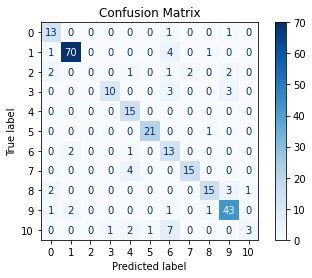

In [6]:
from train import validate
from dataset import get_mean_teacher_dataloaders
from coreplant import Classifier
import torch

NUM_CLASSES = 11
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Classifier(512, 256, NUM_CLASSES).to(device)
state_dict = torch.load('models/coreplant_mendeley.pth')

# Load the state dict into the model
model.load_state_dict(state_dict)
model.eval()


train_loader, test_loader, unlabeled_loader, unlabeled_student_loader = get_mean_teacher_dataloaders('data3/mendeley', 0.2, 16)
validate(model, test_loader, 11)